Taks implemented -
1. Custom feature computing with Tsfresh
2. Data visulaization

In [1]:

import matplotlib.pyplot as plt
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features
from scipy.fft import fft, ifft
from scipy import signal
import seaborn as sns
import numpy as np
import pywt
import statsmodels.api as sm
import csv
import os
import pandas as pd
from tsfresh.feature_extraction import ComprehensiveFCParameters
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

print(os.getcwd())


Dividing the data for compatibility with Tsfresh.

In [ ]:
def divide_chunk_data(desired_time_chunk):
    direc = 'stell_wall_2_current{}'.format(desired_time_chunk)
    parent_direc = r'path2'
    path = os.path.join(parent_direc, direc)
    os.makedirs(path)
    direc = 'chunk_data'
    parent_direc = path
    path1 = os.path.join(parent_direc, direc)
    os.makedirs(path1)
    
    for i in range(1, int(length_list) + 1 ):
        frame_list = []
        divide = portion_based_on_time(i, desired_time_chunk)
        for j in range(1,divide + 1):
            start__timestamp = portion(i,j, 0, False, divide)
            count_nonna = pf['current'].iloc[start__timestamp[0]:start__timestamp[1]].count() 
            data_new = {'id': '{}_{}'.format(i,j),'time':list(range(count_nonna)),  'kind':  'voltage', 'value': pf['voltage'].iloc[start__timestamp[0]:start__timestamp[1]].dropna() }
            df_new1 = pd.DataFrame(data_new)
            frame_list.append(df_new1)
            if j == divide:
                    
                new_dataframe =  pd.concat(frame_list)
                new_dataframe.to_excel(os.path.join(path1, 'test_new{}.xlsx'.format(i)))

TSFresh features of my importance

In [313]:
settings = ComprehensiveFCParameters()

feature_of_interest = ['c3', 'abs_energy', 'sample_entropy','approximate_entropy', 'fourier_entropy','matrix_profile', 'benford_correlation', 'cid_ce','kurtosis', 'skewness','sum_values', 'root_mean_square', 'mean_abs_change', 'mean' , 'number_cwt_peaks','variance', 'time_reversal_asymmetry_statistic', 'variation_coefficient', 'standard_deviation']

dict_of_interest = {}

for i in range(len(feature_of_interest)):
    dict_of_interest[feature_of_interest[i]] = settings[feature_of_interest[i]]



Tsfresh feature extraction for each file of chunk data each layer generated in previous code. Please note the file names. Cross check the data.

In [314]:
def tsfresh_data(desired_time_chunk):
    direc = 'stell_wall_2_{}'.format(desired_time_chunk)
    parent_direc = r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc'
    path = os.path.join(parent_direc, direc)

    direc = 'Tsfresh_features'
    parent_direc = path
    path2 = os.path.join(parent_direc, direc)
    os.makedirs(path2)

    direc = 'chunk_data'
    parent_direc = path
    path1 = os.path.join(parent_direc, direc)
    
    for i in range(1,int(length_list) + 1):
        extracted_features = extract_features(pd.read_excel(os.path.join(path1, 'test_new{}.xlsx'.format(i))),column_id="id", column_sort="time", column_kind="kind", column_value="value", default_fc_parameters = dict_of_interest)
        extracted_features.to_excel(os.path.join(path2,'feature{}.xlsx'.format(i)))


21


C:\Users\z004ffpk\AppData\Local\Temp\ipykernel_9800\1775372892.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 40)
C:\Users\z004ffpk\AppData\Local\Temp\ipykernel_9800\1775372892.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 40)
C:\Users\z004ffpk\AppData\Local\Temp\ipykernel_9800\1775372892.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 40)
C:\Users\z004ffpk\AppData\Local\Temp\ipykernel_9800\1775372892.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 40)
C:\Users\z004ffpk\AppData\Local\Temp\ipykernel_9800\1775372892.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 40)
C:\Users\z004ffpk\AppData\Local\Temp\ipy

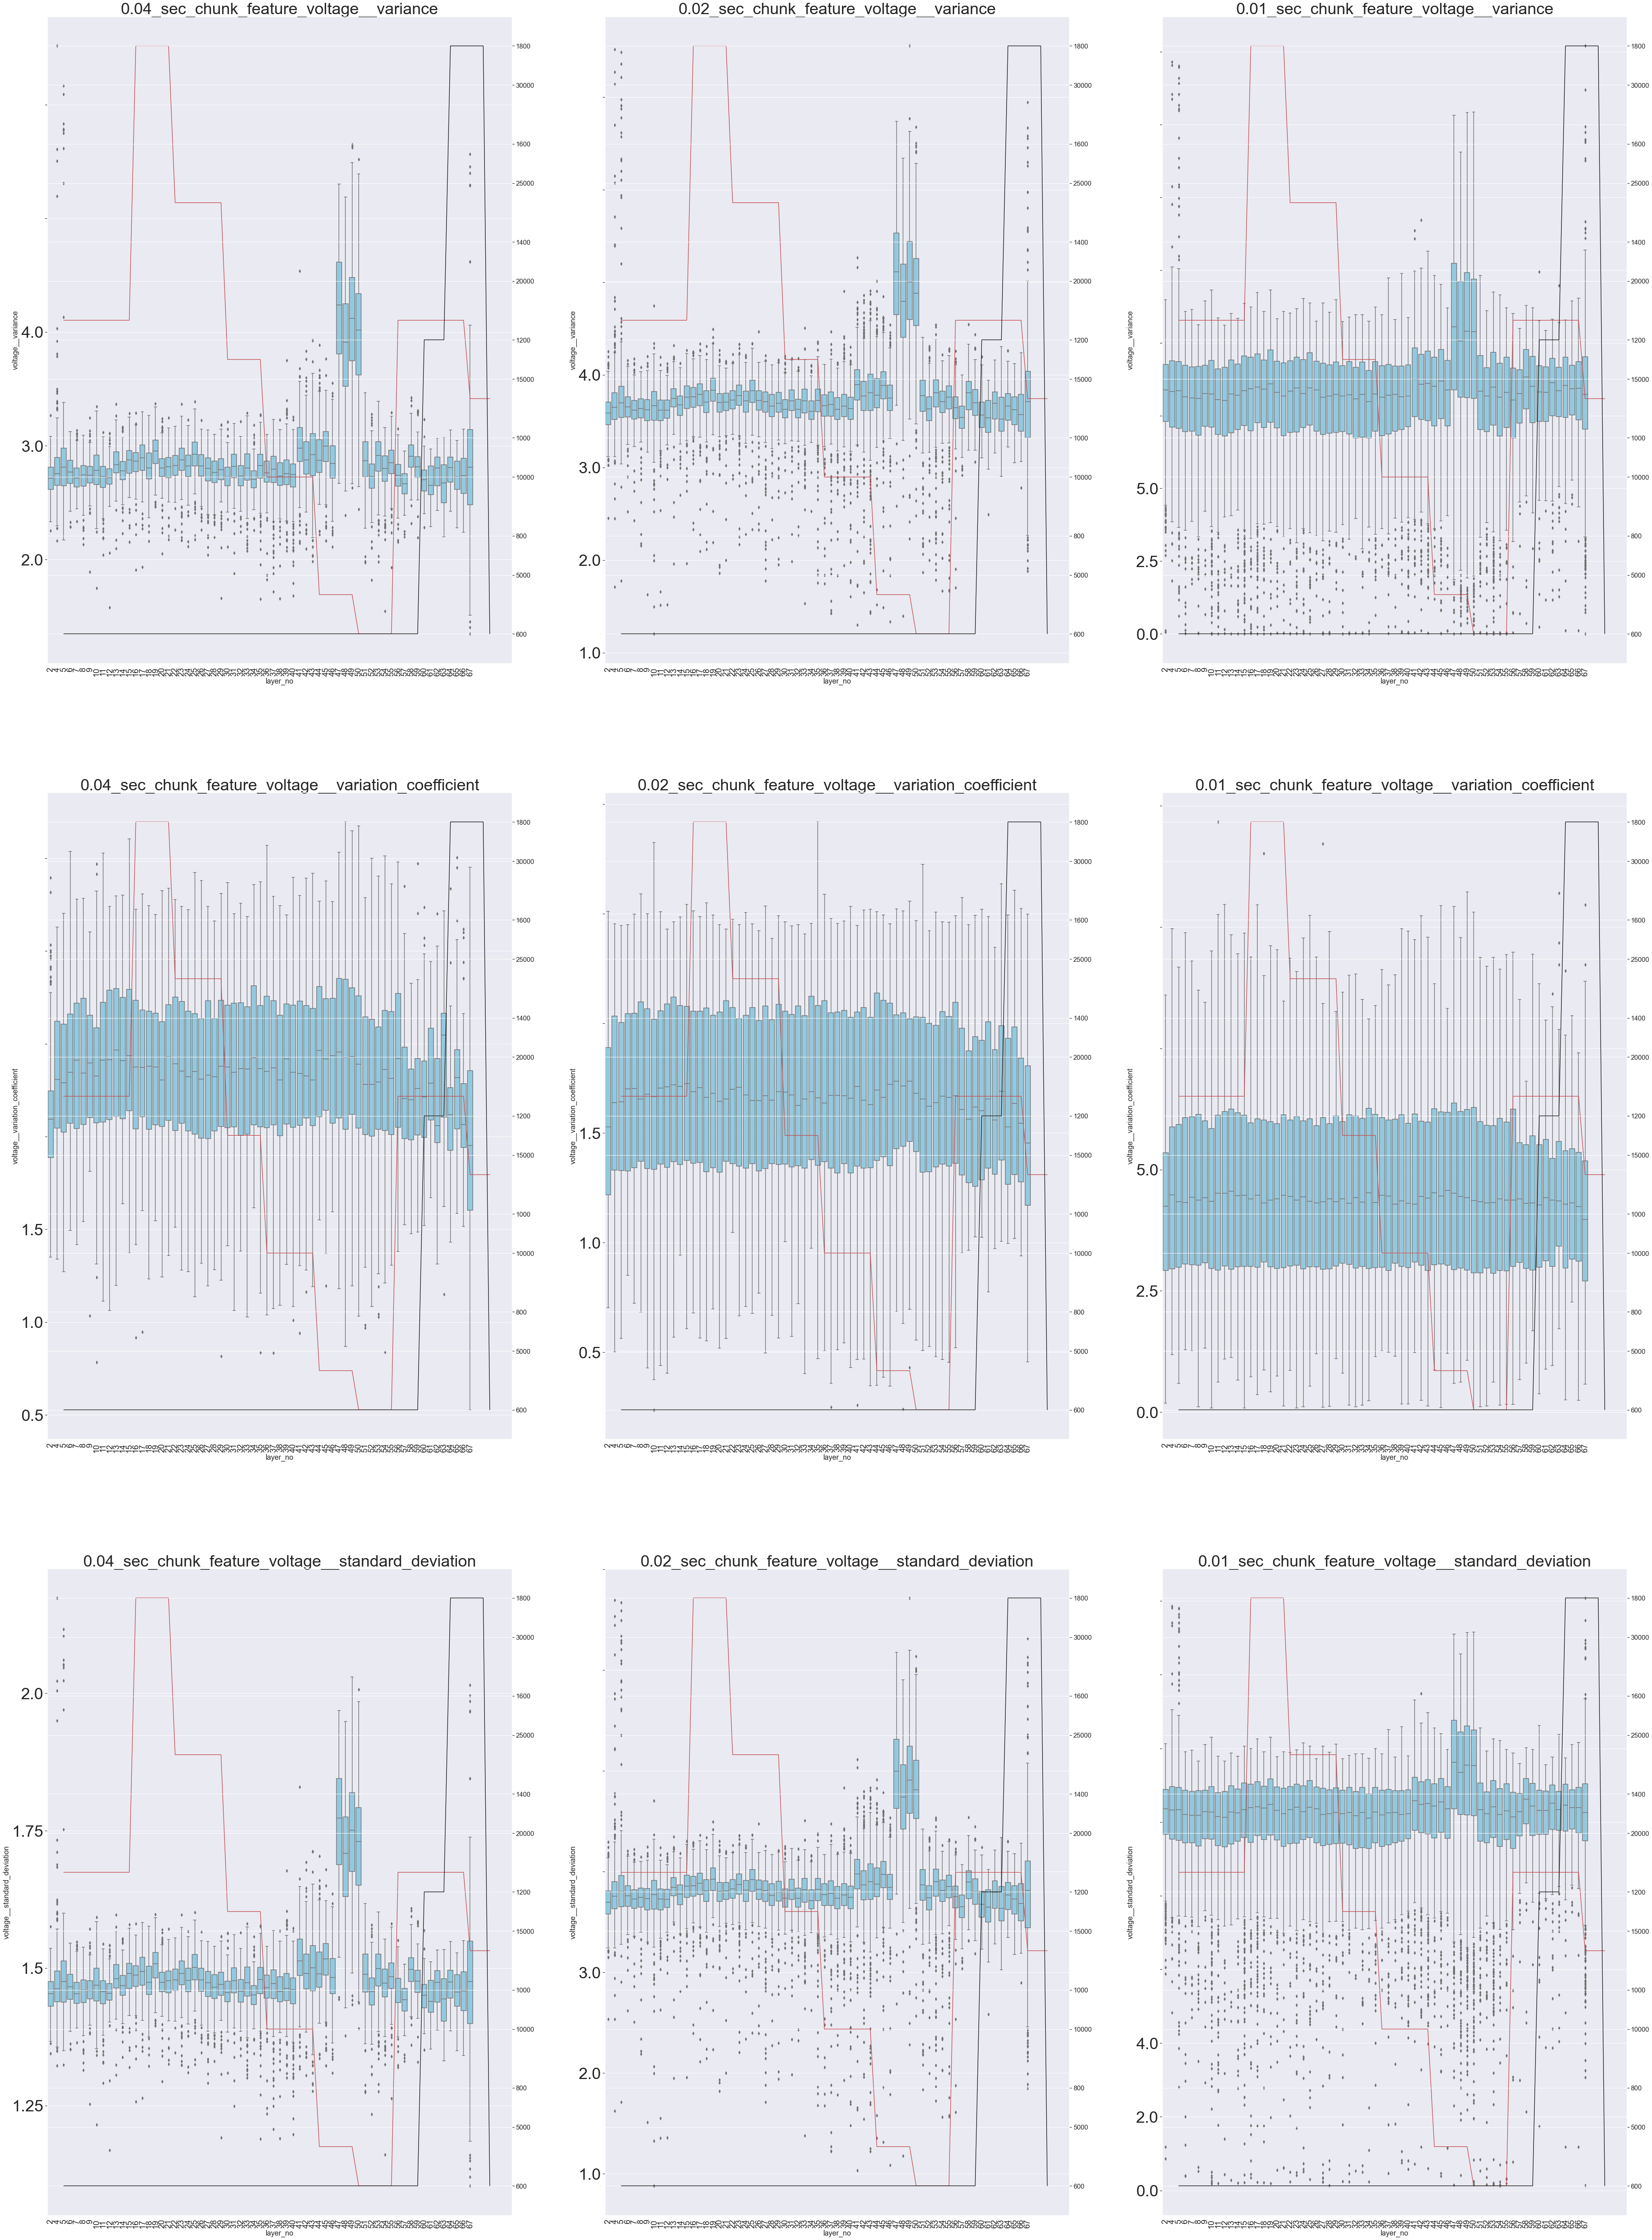

In [239]:
## 1. Update param list 2. Update path for 1 sec file 3. Check plot looks


#list_param1= ['voltage__abs_energy', 'voltage__c3__lag_1', 'voltage__c3__lag_2','voltage__c3__lag_3', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1', 'voltage__approximate_entropy__m_2__r_0.3', 'voltage__approximate_entropy__m_2__r_0.5', 'voltage__approximate_entropy__m_2__r_0.7', 'voltage__approximate_entropy__m_2__r_0.9',  'voltage__fourier_entropy__bins_2',   'voltage__fourier_entropy__bins_3', 'voltage__fourier_entropy__bins_5', 'voltage__fourier_entropy__bins_10',   'voltage__fourier_entropy__bins_100','voltage__matrix_profile__feature_"min"__threshold_0.98','voltage__matrix_profile__feature_"max"__threshold_0.98','voltage__matrix_profile__feature_"mean"__threshold_0.98', 'voltage__matrix_profile__feature_"median"__threshold_0.98',   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__matrix_profile__feature_"75"__threshold_0.98', 'voltage__fourier_entropy__bins_2', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__skewness','voltage__sum_values', 'voltage__root_mean_square', 'voltage__mean_abs_change', 'voltage__mean' , 'voltage__number_cwt_peaks__n_5','voltage__variance', 'voltage__symmetry_looking__r_0.05', 'voltage__time_reversal_asymmetry_statistic__lag_1', 'voltage__time_reversal_asymmetry_statistic__lag_2',  'voltage__time_reversal_asymmetry_statistic__lag_3', 'voltage__variation_coefficient', 'voltage__standard_deviation']
list_param1= ['voltage__c3__lag_1','voltage__abs_energy', 'voltage__sample_entropy', 'voltage__approximate_entropy__m_2__r_0.1', 'voltage__approximate_entropy__m_2__r_0.3', 'voltage__approximate_entropy__m_2__r_0.5', 'voltage__approximate_entropy__m_2__r_0.7','voltage__matrix_profile__feature_"min"__threshold_0.98' ,   'voltage__matrix_profile__feature_"25"__threshold_0.98', 'voltage__benford_correlation', 'voltage__cid_ce__normalize_False','voltage__kurtosis', 'voltage__skewness','voltage__sum_values', 'voltage__root_mean_square', 'voltage__mean_abs_change', 'voltage__mean' , 'voltage__number_cwt_peaks__n_5','voltage__variance', 'voltage__variation_coefficient', 'voltage__standard_deviation']
print(len(list_param1))
data1 = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_0.04.xlsx')
data2 = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_0.02.xlsx')
data3 = pd.read_excel(r'C:\Users\z004ffpk\Desktop\Thesis\Code_Visualization\Steel_wall2_Misc\data_full\data_full_0.01.xlsx')
list_time = [0.04, 0.02 , 0.01]
list_data = [data1, data2, data3 ]

x = 17
fig, axes = plt.subplots(3,3)
for i in range(3):
    x = x + 1
    for j in range(3):
        data_to_use = list_data[j]
        b = sns.boxplot(ax=axes[i, j], data=data_to_use, x='layer_no', y= list_param1[x], color="skyblue")
        y_label = [ 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
        b.set_xticklabels(y_label, size = 20, rotation = 90)
        b.set_yticklabels(b.get_yticks(), size = 40)
        twin1 = axes[i, j].twinx()
        twin2 = axes[i, j].twinx()
        p2 =  twin1.plot(data_to_use['layer_no'],data_to_use['gas_flow'], "r-", label='Gas_flow')
        p3 =  twin2.plot(data_to_use['layer_no'],data_to_use['welding speed'], "k-", label='Welding_Speed' )
        axes[i,j].set_title('{}_sec_chunk_feature_{}'.format(list_time[j], list_param1[x] ), fontsize=40)

fig.tight_layout(pad=20.0)
fig.set_figwidth(70)
fig.set_figheight(100)
plt.show()